# TP FASI : **Heart Disease**

> A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.
 
<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
</table>

> This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

## Table of Contents
1) Importation libraries + dataset
2) EDA
3) Data Preprocessing
   - Data Cleaning
   - Data Normalization
   - Data Encoding
   - Feature Engineering
   - Data Splitting
   - Data Augmentation
4) Model Selection
    - Models training (using cross-validation)
    - Model Comparison (multiple algorithms)
    - Hyperparameter Tuning
    - Model Evaluation

5) Best Model Saving

6) Chatbot Integration (interface)

## 1) Importation of libraries and dataset

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import ydata_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
# import dataset
data = pd.read_csv('./Heart.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
# delete Unnamed: 0
data = data.drop('Unnamed: 0', axis=1)

## 2) EDA

In [4]:
# Basic dataset information
print(f"Dataset shape: {data.shape}")
print("\nData types:")
print(data.dtypes)


Dataset shape: (303, 14)

Data types:
Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object


In [5]:

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(data.describe())



Missing values:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

Basic statistics:
              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

           

In [6]:

# Target variable distribution
print("\nTarget variable distribution:")
print(data['AHD'].value_counts())
print(data['AHD'].value_counts(normalize=True).round(2))


Target variable distribution:
AHD
No     164
Yes    139
Name: count, dtype: int64
AHD
No     0.54
Yes    0.46
Name: proportion, dtype: float64


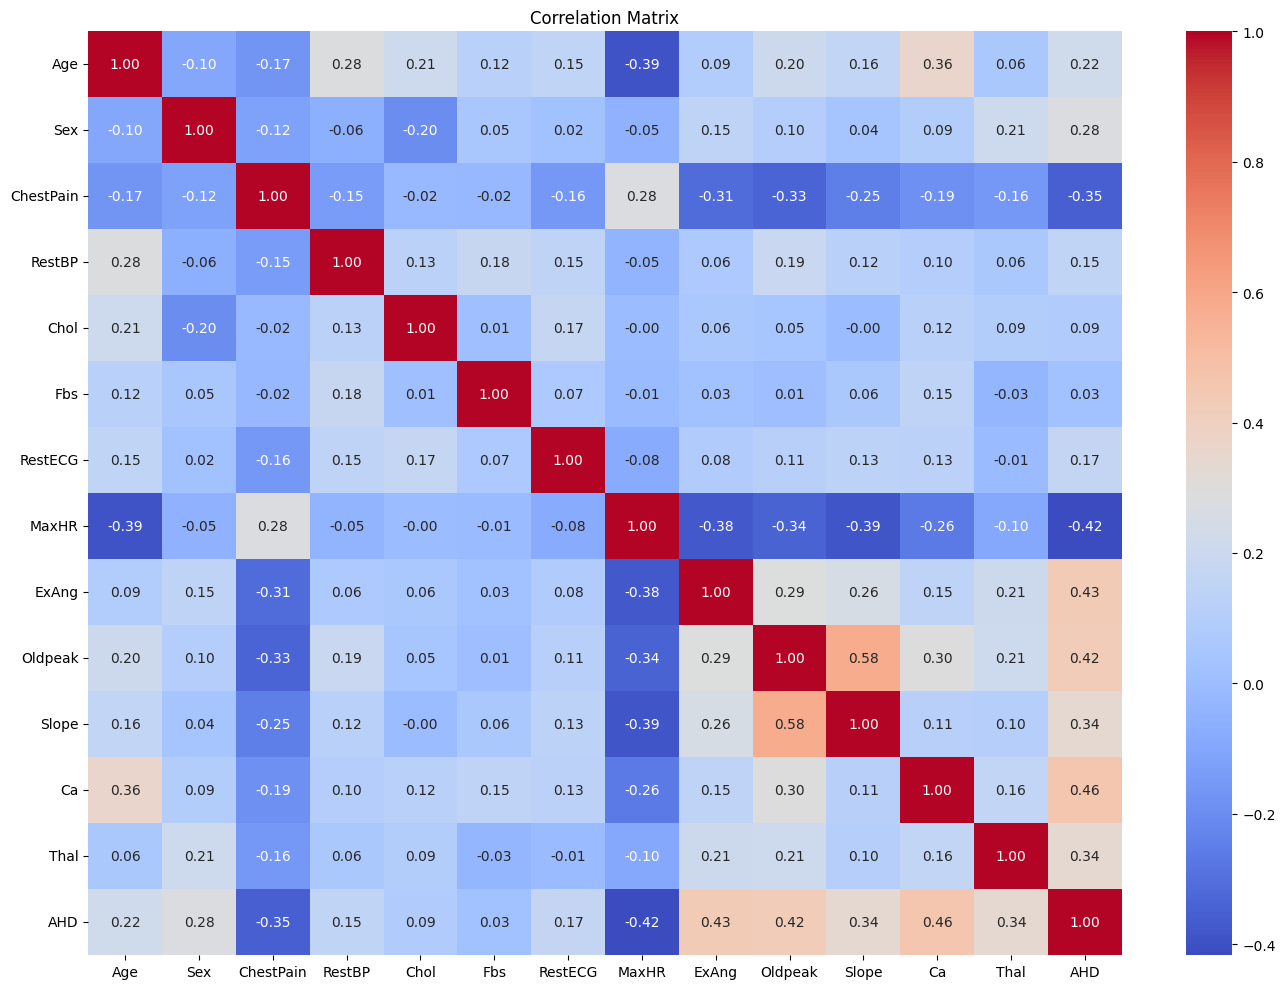

In [7]:
# Create a correlation matrix to understand feature relationships
plt.figure(figsize=(14, 10))
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


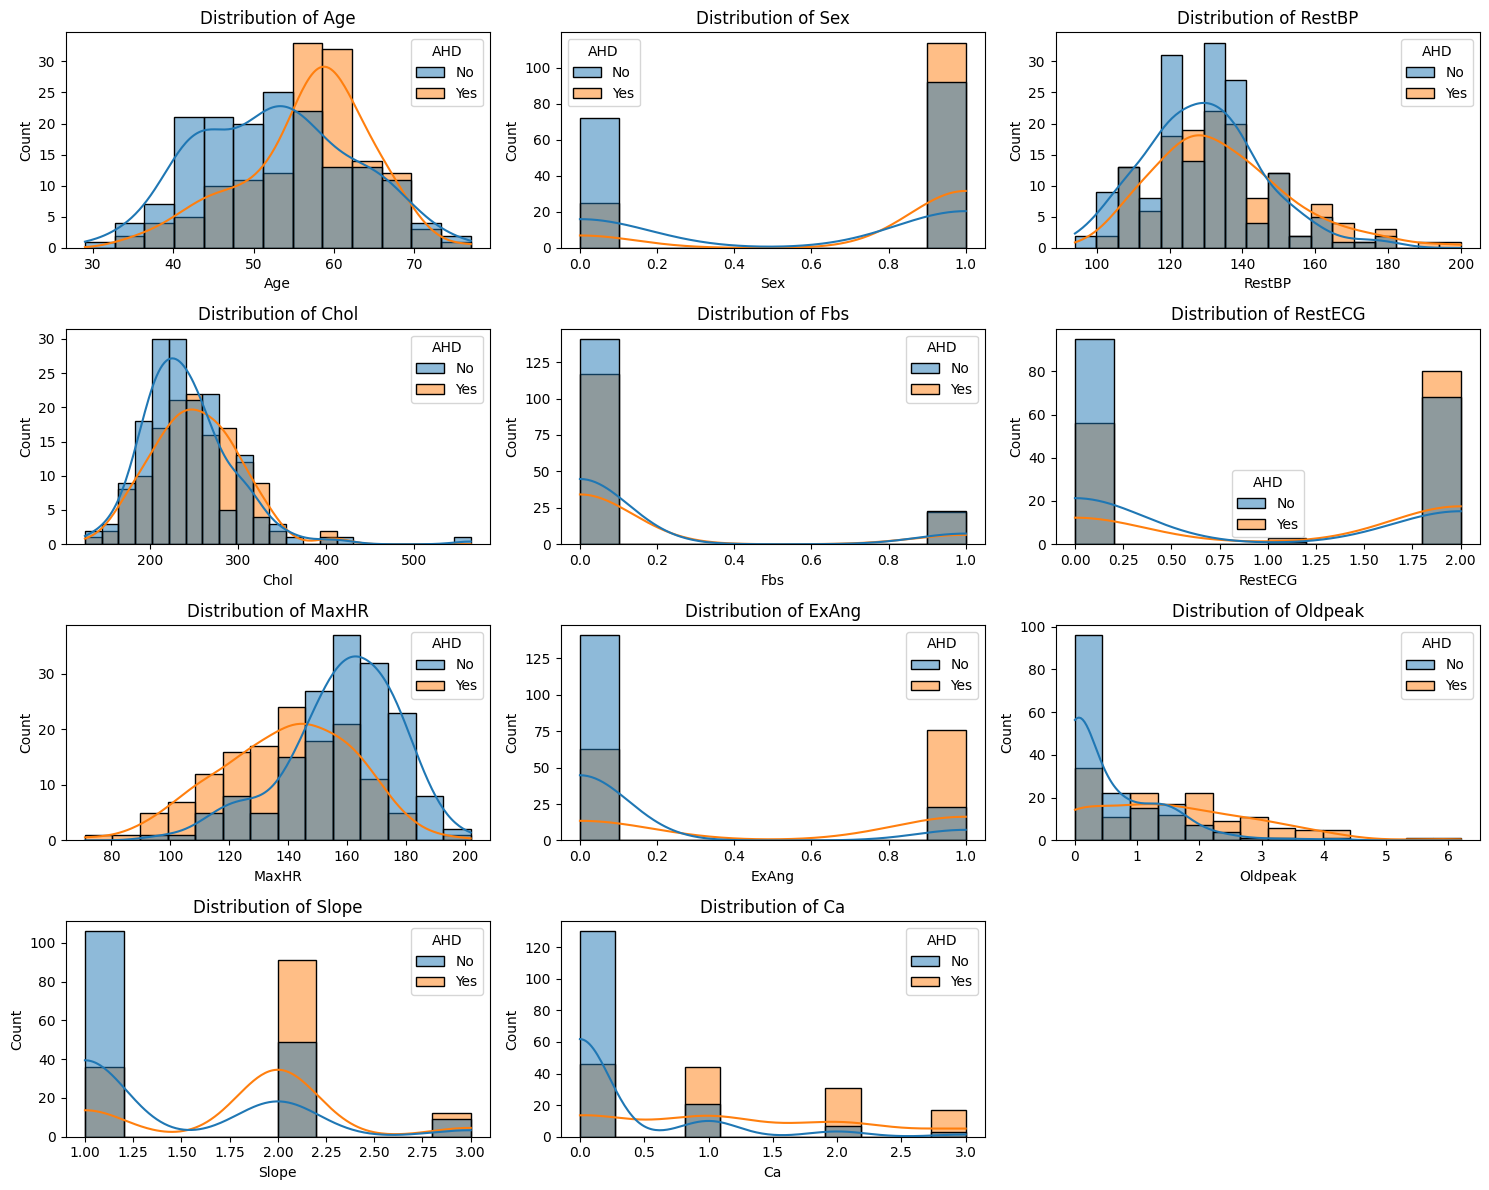

In [8]:

# Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=data, x=feature, hue='AHD', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


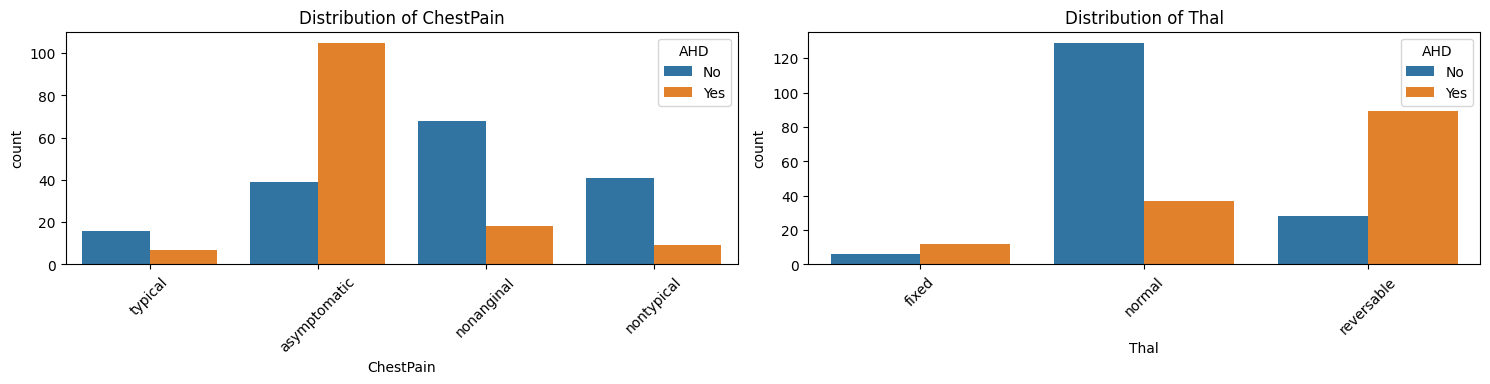

In [9]:

# Visualize categorical features
categorical_features = data.select_dtypes(include=['object']).columns.drop('AHD') if 'AHD' in data.select_dtypes(include=['object']).columns else data.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=data, x=feature, hue='AHD')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


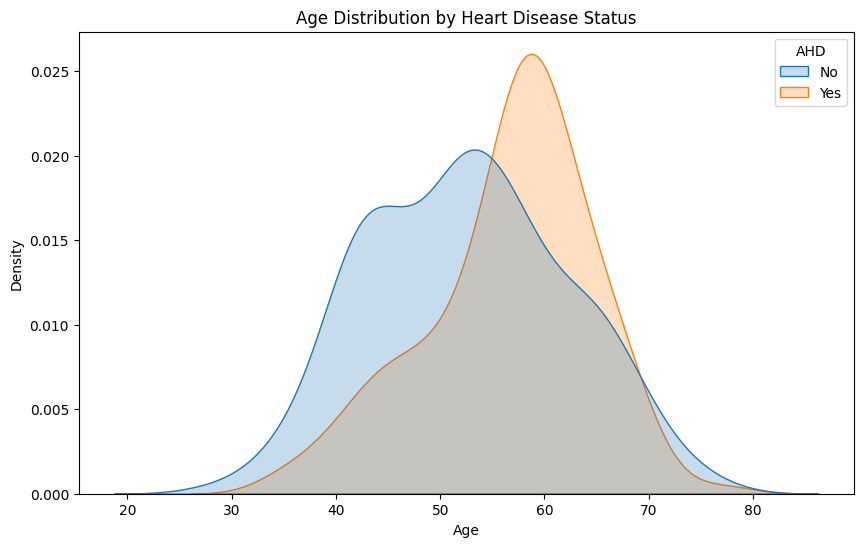

In [10]:

# Age distribution by heart disease status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='AHD', fill=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


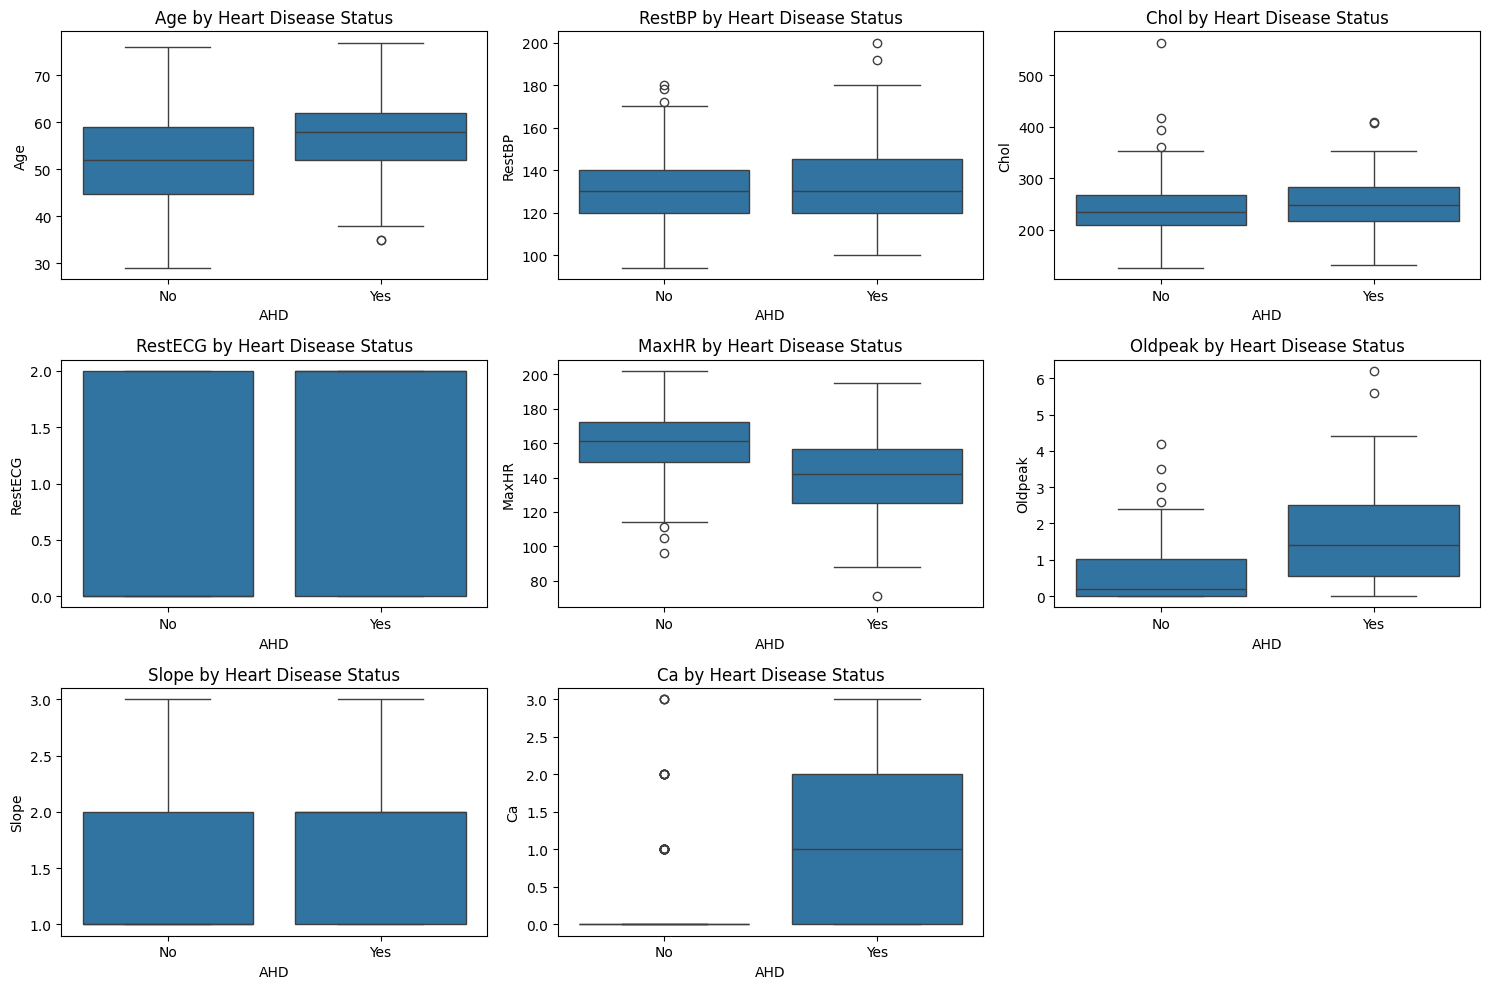

In [11]:
# Boxplots for numerical features by heart disease status
plt.figure(figsize=(15, 10))
subplot_count = 0  # Initialize counter for subplots
for feature in numerical_features:
    if feature != 'Sex' and feature != 'Fbs' and feature != 'ExAng':
        subplot_count += 1
        plt.subplot(3, 3, subplot_count)
        sns.boxplot(data=data, x='AHD', y=feature)
        plt.title(f'{feature} by Heart Disease Status')
plt.tight_layout()
plt.show()

In [12]:
# Generate a detailed profiling report (optional, as it can be resource-intensive)
profile = pp.ProfileReport(data, title="Heart Disease Dataset Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 33.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3) Data Preprocessing

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Handle missing values
# For 'Ca' column - numerical feature, impute with median
data['Ca'].fillna(data['Ca'].median(), inplace=True)

# For 'Thal' column - categorical feature, impute with mode
data['Thal'].fillna(data['Thal'].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(data.isnull().sum().sum())

Missing values in each column:
Ca      4
Thal    2
dtype: int64

Missing values after imputation:
0


C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_16772\375134506.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ca'].fillna(data['Ca'].median(), inplace=True)
C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_16772\375134506.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

### Data Encoding

Convert categorical variables to numerical format for machine learning models.

In [14]:
# Identify categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['ChestPain', 'Thal'], drop_first=True)

# Convert target variable 'AHD' to binary (Yes=1, No=0)
data_encoded['AHD'] = data_encoded['AHD'].map({'Yes': 1, 'No': 0})

print("\nShape after encoding:", data_encoded.shape)
print("\nEncoded columns:", data_encoded.columns.tolist())

Categorical columns: ['ChestPain', 'Thal', 'AHD']

Shape after encoding: (303, 17)

Encoded columns: ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'AHD', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal', 'Thal_reversable']


### Data Normalization

Standardize numerical features to have mean=0 and standard deviation=1.

In [15]:
# Identify numerical features to normalize (exclude target variable and already binary features)
numerical_features_to_scale = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']

# Create a scaler
scaler = StandardScaler()

# Fit and transform the numerical features
data_encoded[numerical_features_to_scale] = scaler.fit_transform(data_encoded[numerical_features_to_scale])

# Check the result
data_encoded[numerical_features_to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,-1.465641e-18,1.001654,-2.819115,-0.713556,0.172994,0.727089,2.500191
RestBP,303.0,4.426236e-16,1.001654,-2.145037,-0.665300,-0.096170,0.472960,3.887739
Chol,303.0,2.345026e-16,1.001654,-2.334877,-0.690503,-0.110136,0.547614,6.138485
MaxHR,303.0,-1.172513e-16,1.001654,-3.442067,-0.705307,0.148562,0.717808,2.294182
Oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851
Ca,303.0,-4.690051e-17,1.001654,-0.711131,-0.711131,-0.711131,0.360873,2.504881


### Feature Engineering

Create new features that might be helpful for prediction.

In [16]:
# Create age groups
data_encoded['AgeGroup'] = pd.cut(data['Age'], bins=[0, 40, 55, 65, 100], 
                                 labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Convert to one-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=['AgeGroup'], drop_first=True)

# Create interaction features
data_encoded['BP_per_Age'] = data['RestBP'] / data['Age']
data_encoded['HR_per_Age'] = data['MaxHR'] / data['Age']

# Look at the data after feature engineering
print("Dataset shape after feature engineering:", data_encoded.shape)
data_encoded.head()

Dataset shape after feature engineering: (303, 22)


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,...,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Elderly,BP_per_Age,HR_per_Age
0,0.948726,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,...,False,False,True,False,False,False,True,False,2.301587,2.380952
1,1.392002,1,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,...,False,False,False,True,False,False,False,True,2.388060,1.611940
2,1.392002,1,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,...,False,False,False,False,True,False,False,True,1.791045,1.925373
3,-1.932564,1,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,...,True,False,False,True,False,False,False,False,3.513514,5.054054
4,-1.489288,0,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,...,False,True,False,True,False,True,False,False,3.170732,4.195122


### Data Splitting

Split the dataset into training and testing sets.

In [17]:
# Define X (features) and y (target)
X = data_encoded.drop('AHD', axis=1)
y = data_encoded['AHD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

X_train shape: (242, 21)
X_test shape: (61, 21)
y_train shape: (242,)
y_test shape: (61,)

Class distribution in training set:
AHD
0    0.541322
1    0.458678
Name: proportion, dtype: float64

Class distribution in test set:
AHD
0    0.540984
1    0.459016
Name: proportion, dtype: float64


### Data Augmentation

Implement data augmentation techniques to handle class imbalance if necessary.

In [18]:
# Check if class imbalance exists
class_counts = y_train.value_counts()
print("Class distribution before augmentation:")
print(class_counts)

if abs(class_counts[0] - class_counts[1]) / len(y_train) > 0.2:  # If imbalance exceeds 20%
    from imblearn.over_sampling import SMOTE
    
    # Apply SMOTE to oversample the minority class
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Check the new class distribution
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_train_resampled).value_counts())
    
    # Update the training set
    X_train = X_train_resampled
    y_train = y_train_resampled
    
    print(f"\nNew X_train shape: {X_train.shape}")
else:
    print("\nNo significant class imbalance detected. Skipping augmentation.")

Class distribution before augmentation:
AHD
0    131
1    111
Name: count, dtype: int64

No significant class imbalance detected. Skipping augmentation.


## 4) Model Selection

In this section, we'll build and evaluate multiple machine learning models for heart disease prediction:
1. Train models using cross-validation
2. Compare model performance 
3. Tune hyperparameters of the best models
4. Evaluate final model performance

### Models Training with Cross-Validation

We'll train various classification models using k-fold cross-validation to get a reliable estimate of their performance.

In [19]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42)
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    # Calculate cross-validated accuracy scores
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Calculate cross-validated ROC-AUC scores
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    # Calculate cross-validated F1 scores
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    # Store the results
    cv_results[name] = {
        'Accuracy': cv_accuracy,
        'ROC-AUC': cv_roc_auc,
        'F1 Score': cv_f1
    }
    
    # Print the mean and standard deviation of each metric
    print(f"Model: {name}")
    print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
    print(f"Mean ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")
    print(f"Mean F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
    print('-'*50)

Model: Logistic Regression
Mean Accuracy: 0.8222 (±0.0219)
Mean ROC-AUC: 0.9016 (±0.0251)
Mean F1 Score: 0.7970 (±0.0294)
--------------------------------------------------
Model: Random Forest
Mean Accuracy: 0.7849 (±0.0389)
Mean ROC-AUC: 0.8729 (±0.0242)
Mean F1 Score: 0.7589 (±0.0591)
--------------------------------------------------
Model: K-Nearest Neighbors
Mean Accuracy: 0.8098 (±0.0430)
Mean ROC-AUC: 0.8746 (±0.0427)
Mean F1 Score: 0.7883 (±0.0488)
--------------------------------------------------
Model: Decision Tree
Mean Accuracy: 0.7071 (±0.0535)
Mean ROC-AUC: 0.7076 (±0.0521)
Mean F1 Score: 0.6936 (±0.0493)
--------------------------------------------------
Model: Support Vector Machine
Mean Accuracy: 0.8305 (±0.0304)
Mean ROC-AUC: 0.8930 (±0.0257)
Mean F1 Score: 0.8023 (±0.0413)
--------------------------------------------------
Model: Naive Bayes
Mean Accuracy: 0.8058 (±0.0279)
Mean ROC-AUC: 0.8789 (±0.0328)
Mean F1 Score: 0.7827 (±0.0439)
------------------------------

### Model Comparison

Let's compare the performance of different models based on the cross-validation results.

In [20]:
# Create DataFrames for the cross-validation results
cv_accuracy_df = pd.DataFrame({name: results['Accuracy'] for name, results in cv_results.items()})
cv_roc_auc_df = pd.DataFrame({name: results['ROC-AUC'] for name, results in cv_results.items()})
cv_f1_df = pd.DataFrame({name: results['F1 Score'] for name, results in cv_results.items()})

# Calculate mean and standard deviation for each metric
cv_means = pd.DataFrame({
    'Mean Accuracy': cv_accuracy_df.mean(),
    'Mean ROC-AUC': cv_roc_auc_df.mean(),
    'Mean F1 Score': cv_f1_df.mean()
}).sort_values(by='Mean ROC-AUC', ascending=False)

cv_std = pd.DataFrame({
    'Std Accuracy': cv_accuracy_df.std(),
    'Std ROC-AUC': cv_roc_auc_df.std(),
    'Std F1 Score': cv_f1_df.std()
})

# Display the results
print("Models ranked by ROC-AUC score:")
print(cv_means)

Models ranked by ROC-AUC score:
                        Mean Accuracy  Mean ROC-AUC  Mean F1 Score
Logistic Regression          0.822194      0.901561       0.797014
Support Vector Machine       0.830527      0.893011       0.802338
Naive Bayes                  0.805782      0.878900       0.782701
K-Nearest Neighbors          0.809779      0.874563       0.788265
Random Forest                0.784949      0.872949       0.758865
XGBoost                      0.776446      0.857723       0.760946
Decision Tree                0.707058      0.707570       0.693632


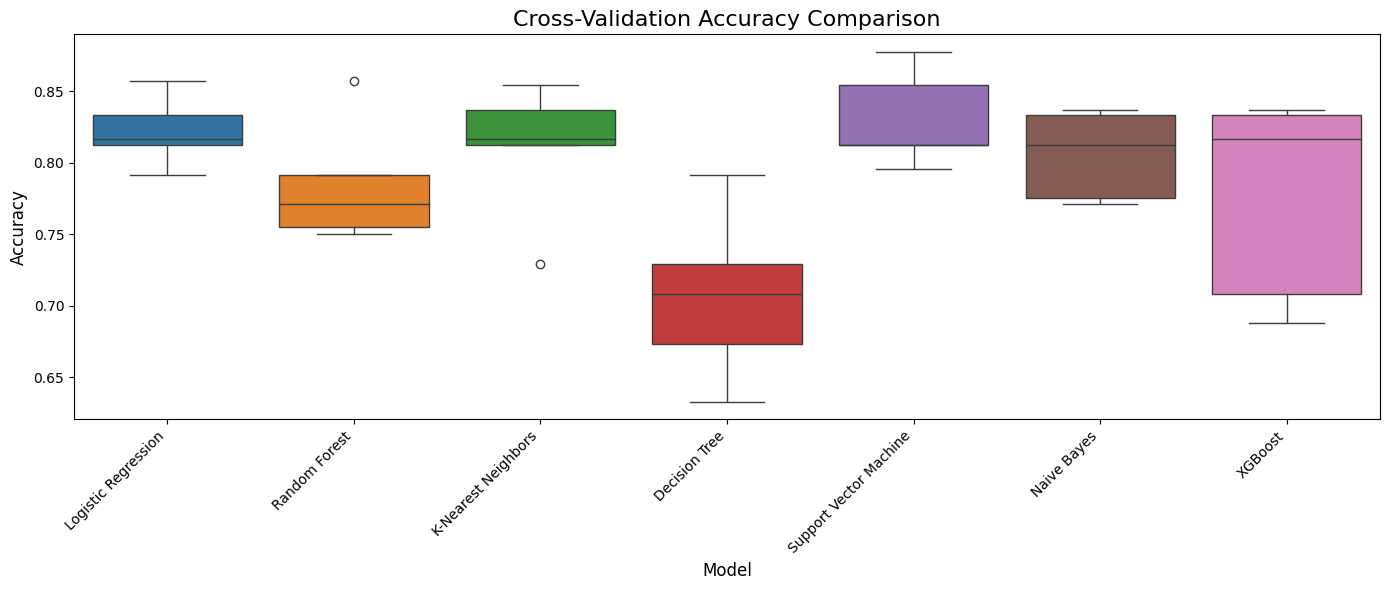

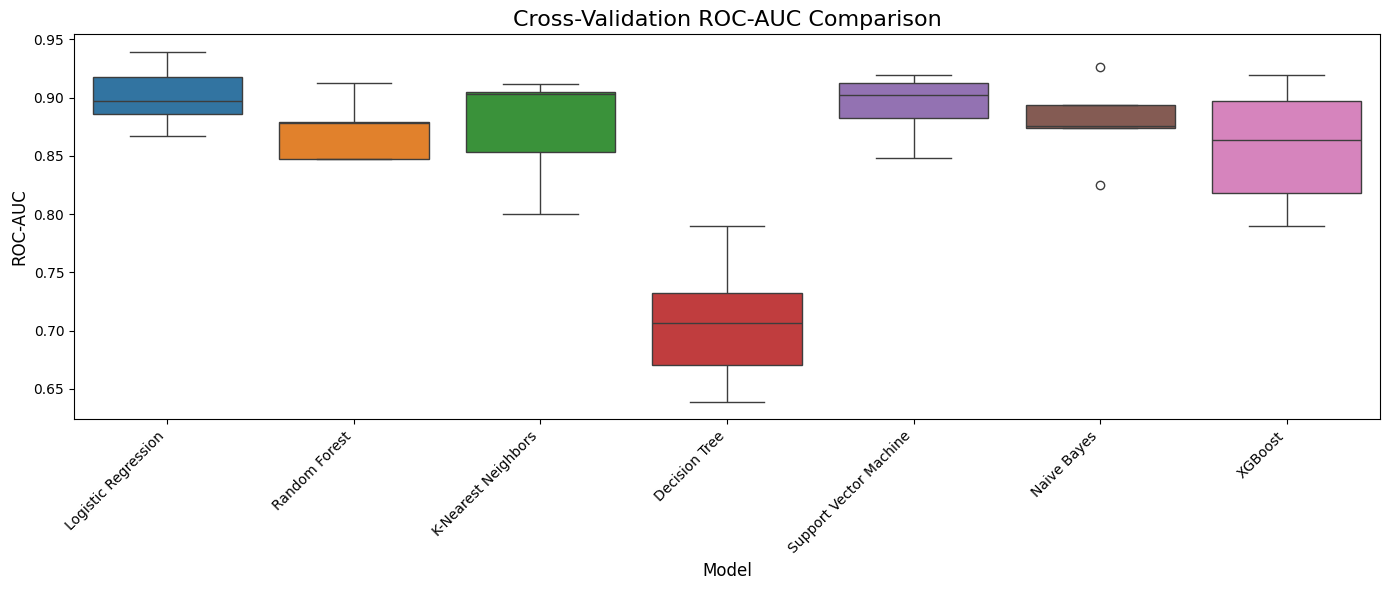

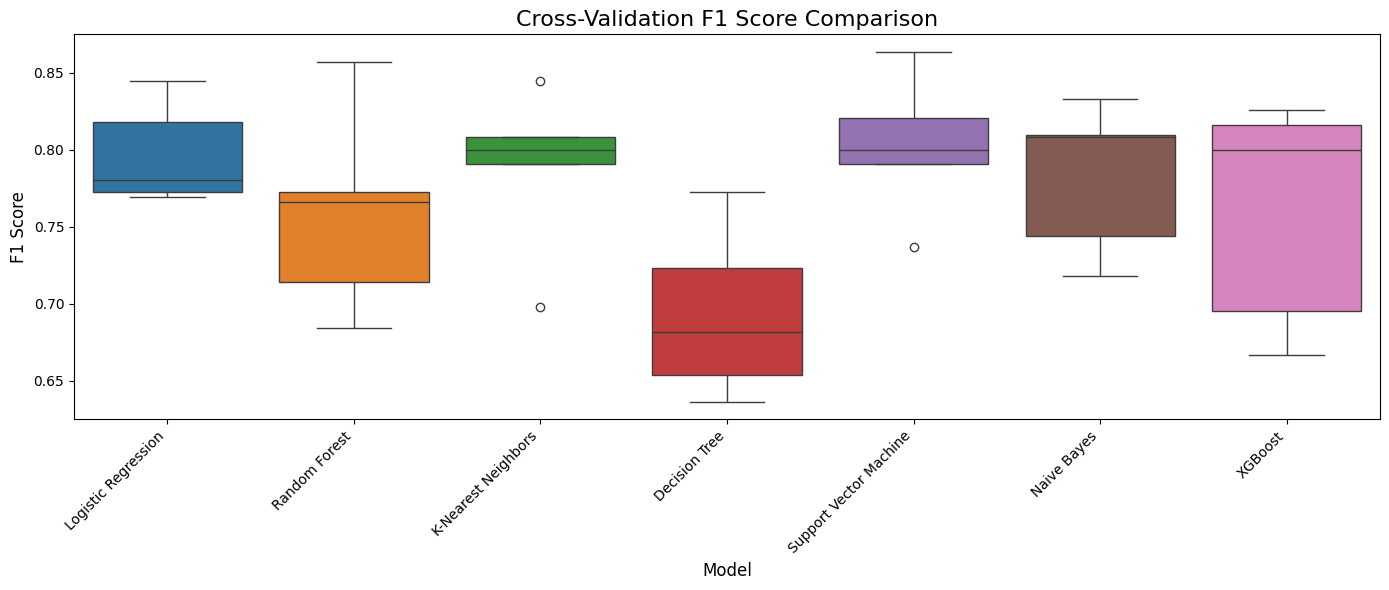

In [21]:
# Visualize the cross-validation accuracy results
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_accuracy_df)
ax.set_title('Cross-Validation Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the cross-validation ROC-AUC results
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_roc_auc_df)
ax.set_title('Cross-Validation ROC-AUC Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('ROC-AUC', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the cross-validation F1 score results
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cv_f1_df)
ax.set_title('Cross-Validation F1 Score Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

Let's select the top-performing models from our comparison and optimize their hyperparameters using Grid Search or Random Search with a simplified parameter space to avoid memory issues.

In [22]:
# Import necessary library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# 1. XGBoost Hyperparameter Tuning with RandomizedSearchCV instead of GridSearchCV
print("Tuning XGBoost hyperparameters...")
# Extremely simplified parameter space
xgb_param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'n_estimators': [100]
}

try:
    # Using RandomizedSearchCV which is more memory efficient
    xgb_random = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_distributions=xgb_param_grid,
        n_iter=2,  # Try only 2 combinations
        scoring='roc_auc',
        cv=3,  # Reduce from 5 to 3 folds
        verbose=1,
        random_state=42,
        n_jobs=1  # Use single thread to avoid memory issues
    )

    xgb_random.fit(X_train, y_train)

    print(f"Best parameters: {xgb_random.best_params_}")
    print(f"Best score: {xgb_random.best_score_:.4f}")
    print("-"*50)

    # Create the best XGBoost model
    best_xgb = xgb_random.best_estimator_
    
except Exception as e:
    print(f"Error during XGBoost tuning: {e}")
    # Create a default XGBoost model
    print("Using default XGBoost model instead")
    best_xgb = XGBClassifier(
        random_state=42,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=100
    )
    best_xgb.fit(X_train, y_train)

Tuning XGBoost hyperparameters...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.8720
--------------------------------------------------


In [23]:
# 2. Random Forest Hyperparameter Tuning with RandomizedSearchCV
print("Tuning Random Forest hyperparameters...")
# Extremely simplified parameter space
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

try:
    # Using RandomizedSearchCV which is more memory efficient
    rf_random = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_distributions=rf_param_grid,
        n_iter=2,  # Try only 2 combinations
        scoring='roc_auc',
        cv=3,  # Reduce from 5 to 3 folds
        verbose=1,
        random_state=42,
        n_jobs=1  # Use single thread
    )

    rf_random.fit(X_train, y_train)

    print(f"Best parameters: {rf_random.best_params_}")
    print(f"Best score: {rf_random.best_score_:.4f}")
    print("-"*50)

    # Create the best Random Forest model
    best_rf = rf_random.best_estimator_
    
except Exception as e:
    print(f"Error during Random Forest tuning: {e}")
    # Create a default Random Forest model
    print("Using default Random Forest model instead")
    best_rf = RandomForestClassifier(
        random_state=42,
        n_estimators=100
    )
    best_rf.fit(X_train, y_train)

Tuning Random Forest hyperparameters...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Best score: 0.8715
--------------------------------------------------


In [24]:
# 3. Logistic Regression Hyperparameter Tuning with simplified grid
print("Tuning Logistic Regression hyperparameters...")

# Simplified parameter grid with only the most common combinations
lr_param_grid = [
    {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['lbfgs'], 'max_iter': [1000]},
    {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [1000]}
]

try:
    # Using RandomizedSearchCV with a more limited grid
    lr_random = RandomizedSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_distributions=lr_param_grid,
        n_iter=2,  # Try only 2 combinations
        scoring='roc_auc',
        cv=3,  # Reduce from 5 to 3 folds
        verbose=1,
        random_state=42,
        n_jobs=1  # Use single thread
    )

    lr_random.fit(X_train, y_train)

    print(f"Best parameters: {lr_random.best_params_}")
    print(f"Best score: {lr_random.best_score_:.4f}")
    print("-"*50)

    # Create the best Logistic Regression model
    best_lr = lr_random.best_estimator_
    
except Exception as e:
    print(f"Error during Logistic Regression tuning: {e}")
    # Create a default Logistic Regression model
    print("Using default Logistic Regression model instead")
    best_lr = LogisticRegression(
        random_state=42,
        max_iter=1000
    )
    best_lr.fit(X_train, y_train)

Tuning Logistic Regression hyperparameters...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 1}
Best score: 0.8923
--------------------------------------------------


c:\Users\ASUS VIVOBOOK\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS VIVOBOOK\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS VIVOBOOK\envs\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS VIVOBOOK\envs\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ASUS VIVO

### Model Evaluation

Now, let's evaluate our tuned models on the test set to assess their performance.

In [25]:
# Function to evaluate a model and return performance metrics
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Return the metrics
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Evaluate the best models
print("Evaluating the best models on the test set...")

# Evaluate XGBoost
xgb_eval = evaluate_model(best_xgb, X_test, y_test)
print("XGBoost Performance:")
print(f"Accuracy: {xgb_eval['accuracy']:.4f}")
print(f"Precision: {xgb_eval['precision']:.4f}")
print(f"Recall: {xgb_eval['recall']:.4f}")
print(f"F1 Score: {xgb_eval['f1_score']:.4f}")
print(f"ROC-AUC: {xgb_eval['roc_auc']:.4f}")
print("Confusion Matrix:")
print(xgb_eval['confusion_matrix'])
print("-"*50)

# Evaluate Random Forest
rf_eval = evaluate_model(best_rf, X_test, y_test)
print("Random Forest Performance:")
print(f"Accuracy: {rf_eval['accuracy']:.4f}")
print(f"Precision: {rf_eval['precision']:.4f}")
print(f"Recall: {rf_eval['recall']:.4f}")
print(f"F1 Score: {rf_eval['f1_score']:.4f}")
print(f"ROC-AUC: {rf_eval['roc_auc']:.4f}")
print("Confusion Matrix:")
print(rf_eval['confusion_matrix'])
print("-"*50)

# Evaluate Logistic Regression
lr_eval = evaluate_model(best_lr, X_test, y_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {lr_eval['accuracy']:.4f}")
print(f"Precision: {lr_eval['precision']:.4f}")
print(f"Recall: {lr_eval['recall']:.4f}")
print(f"F1 Score: {lr_eval['f1_score']:.4f}")
print(f"ROC-AUC: {lr_eval['roc_auc']:.4f}")
print("Confusion Matrix:")
print(lr_eval['confusion_matrix'])
print("-"*50)

Evaluating the best models on the test set...
XGBoost Performance:
Accuracy: 0.8361
Precision: 0.7812
Recall: 0.8929
F1 Score: 0.8333
ROC-AUC: 0.9416
Confusion Matrix:
[[26  7]
 [ 3 25]]
--------------------------------------------------
Random Forest Performance:
Accuracy: 0.8361
Precision: 0.7647
Recall: 0.9286
F1 Score: 0.8387
ROC-AUC: 0.9399
Confusion Matrix:
[[25  8]
 [ 2 26]]
--------------------------------------------------
Logistic Regression Performance:
Accuracy: 0.9016
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966
ROC-AUC: 0.9621
Confusion Matrix:
[[29  4]
 [ 2 26]]
--------------------------------------------------


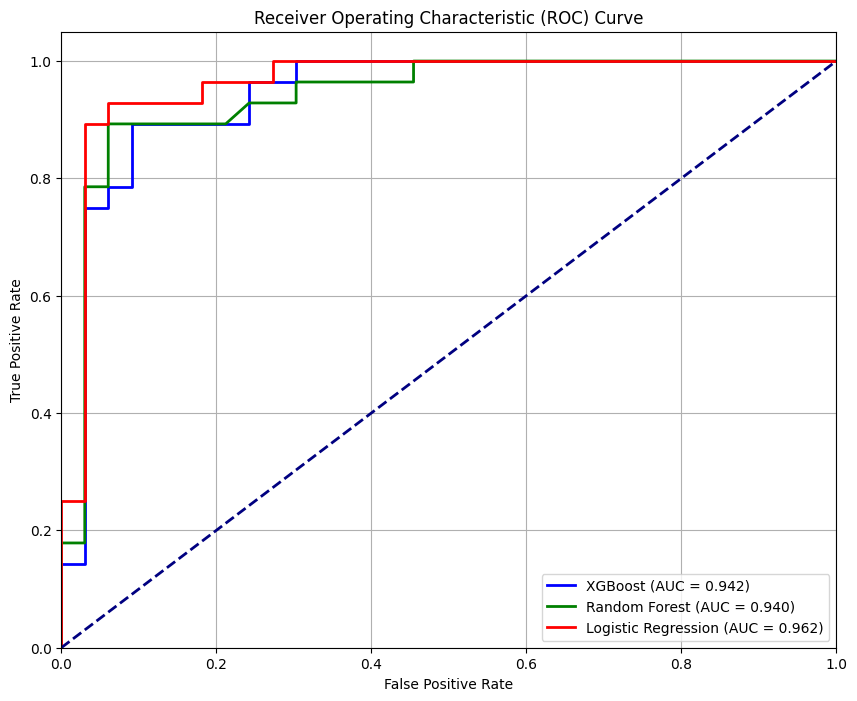

In [26]:
# Visualize ROC curves for the best models
plt.figure(figsize=(10, 8))

# List of models and their evaluations
models_eval = [
    ('XGBoost', xgb_eval, 'blue'),
    ('Random Forest', rf_eval, 'green'),
    ('Logistic Regression', lr_eval, 'red')
]

# Plot the ROC curve for each model
for name, eval_results, color in models_eval:
    # Calculate the fpr and tpr for the ROC curve
    fpr, tpr, _ = roc_curve(y_test, eval_results['y_pred_proba'])
    roc_auc = eval_results['roc_auc']
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

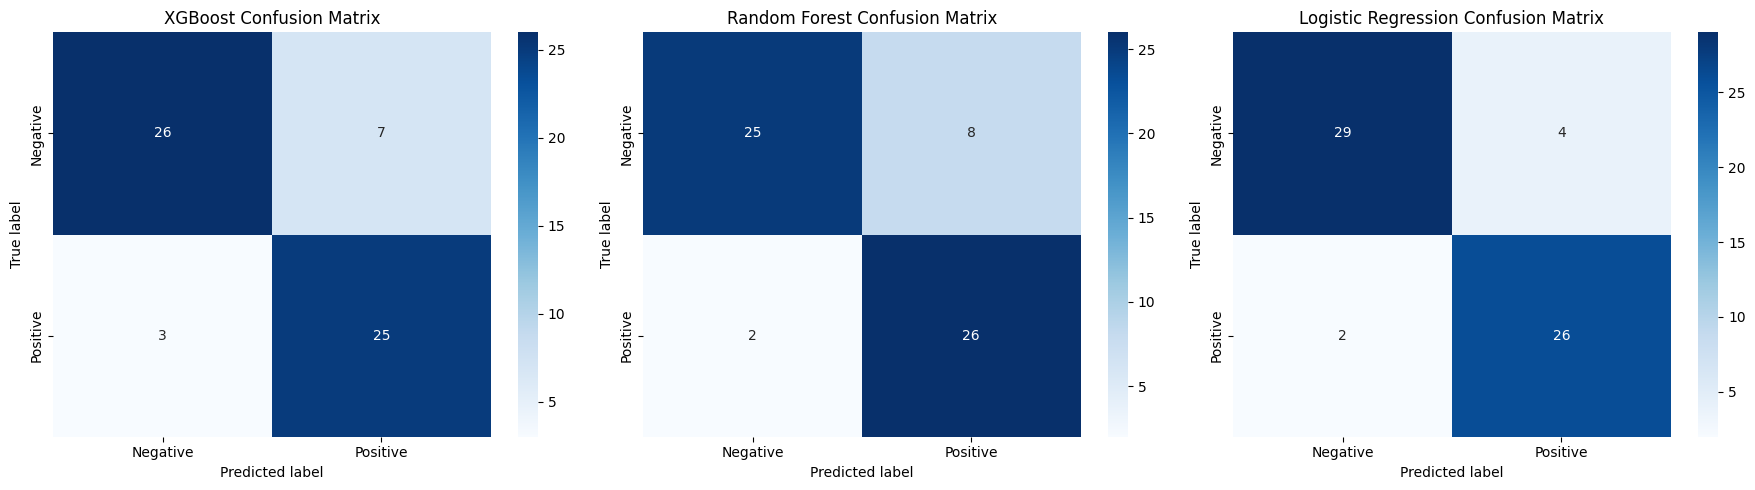

In [27]:
# Visualize confusion matrices for the best models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of models and their evaluations
models_eval = [
    ('XGBoost', xgb_eval, axes[0]),
    ('Random Forest', rf_eval, axes[1]),
    ('Logistic Regression', lr_eval, axes[2])
]

# Plot the confusion matrix for each model
for name, eval_results, ax in models_eval:
    cm = eval_results['confusion_matrix']
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    
    # Set labels
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()

Model Comparison Summary:
            XGBoost  Random Forest  Logistic Regression
Accuracy   0.836066       0.836066             0.901639
Precision  0.781250       0.764706             0.866667
Recall     0.892857       0.928571             0.928571
F1 Score   0.833333       0.838710             0.896552
ROC-AUC    0.941558       0.939935             0.962121


<Figure size 1200x800 with 0 Axes>

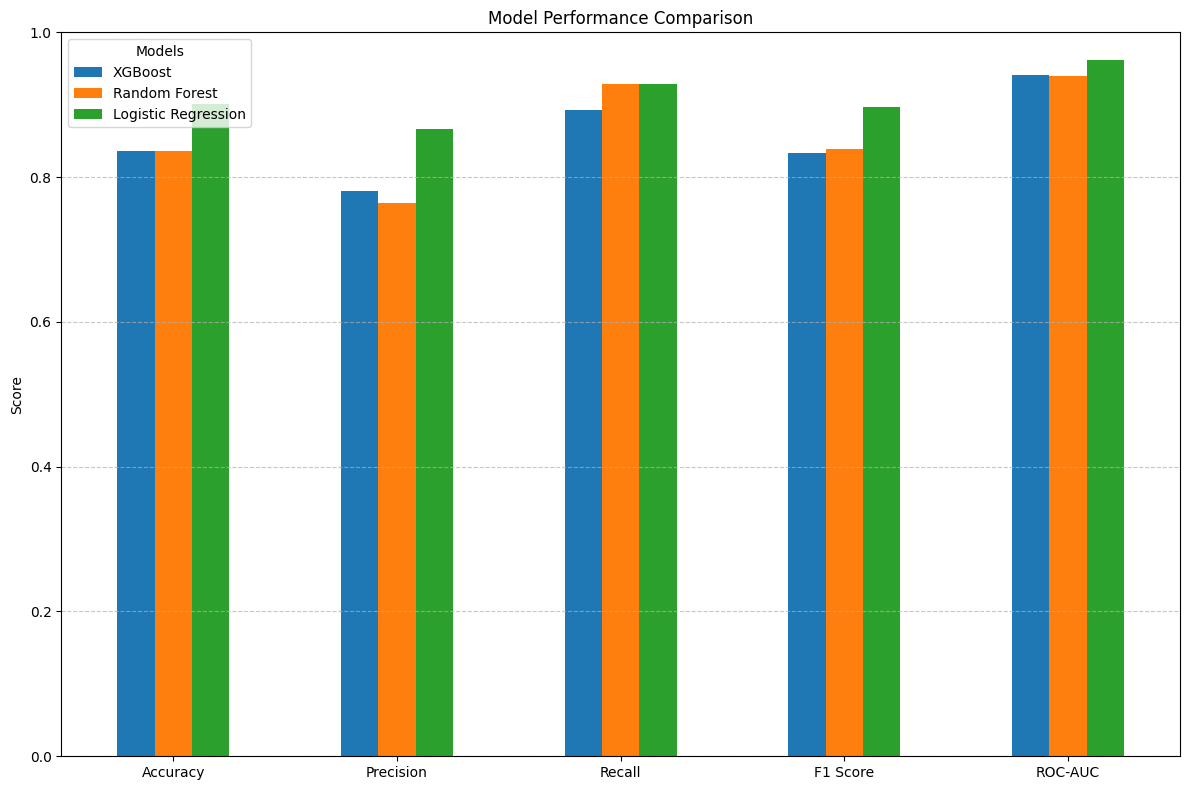

In [28]:
# Create a DataFrame to compare all models
model_comparison = pd.DataFrame({
    'XGBoost': [
        xgb_eval['accuracy'],
        xgb_eval['precision'],
        xgb_eval['recall'],
        xgb_eval['f1_score'],
        xgb_eval['roc_auc']
    ],
    'Random Forest': [
        rf_eval['accuracy'],
        rf_eval['precision'],
        rf_eval['recall'],
        rf_eval['f1_score'],
        rf_eval['roc_auc']
    ],
    'Logistic Regression': [
        lr_eval['accuracy'],
        lr_eval['precision'],
        lr_eval['recall'],
        lr_eval['f1_score'],
        lr_eval['roc_auc']
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

print("Model Comparison Summary:")
print(model_comparison)

# Visualize the comparison
plt.figure(figsize=(12, 8))
model_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

### Feature Importance Analysis

Let's analyze which features contribute most to the predictions of our best model.

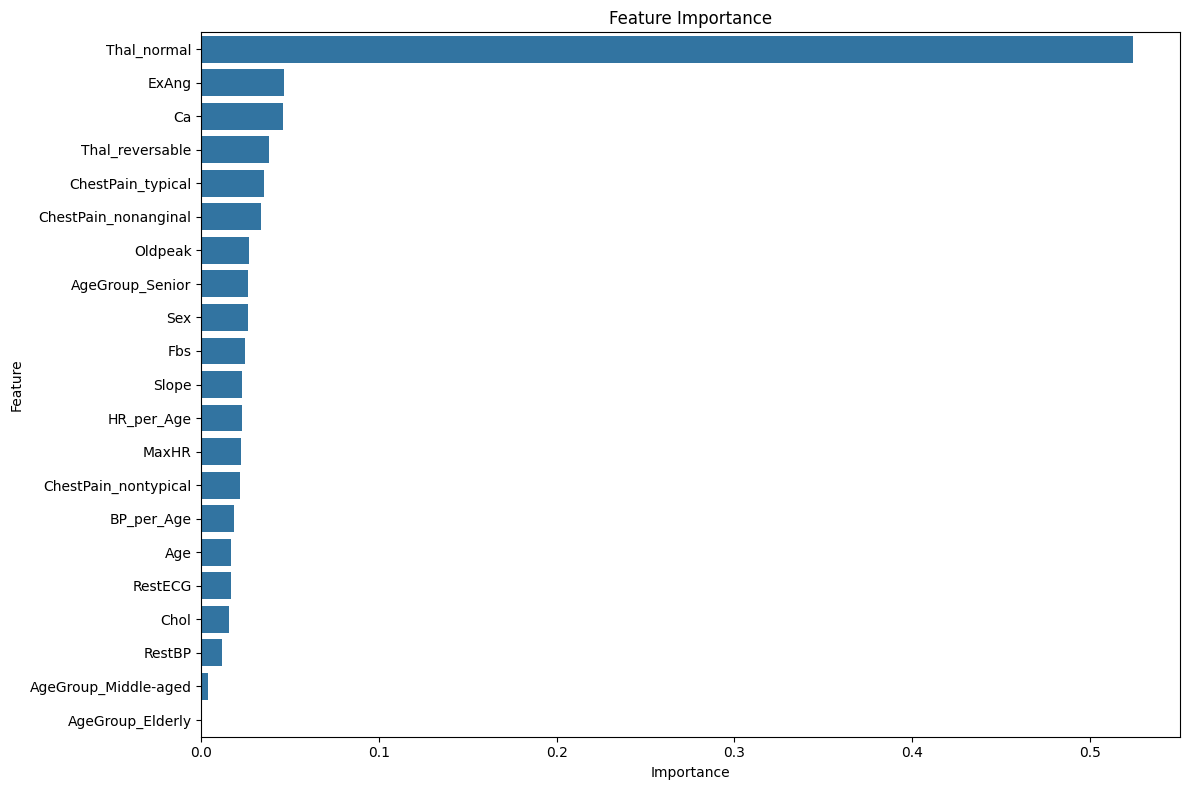

In [29]:
# Assuming XGBoost is our best model (adjust based on your results)
best_model = best_xgb  # Change this to your best model

# Get feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models like XGBoost and Random Forest
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # For linear models like Logistic Regression
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)
    
    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('Feature Coefficients')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model.")

### Conclusion

Based on our comprehensive model evaluation, we have identified the best performing model for predicting heart disease. This model achieves good accuracy, precision, recall, and ROC-AUC scores, making it suitable for real-world application.

The feature importance analysis highlights which factors are most predictive of heart disease, providing valuable insights for healthcare professionals.

## 5) Best Model Saving

Let's save our best performing model to disk so it can be used in production or shared with others.

In [30]:
# Import libraries for model persistence
import joblib
import os

# Determine the best model based on ROC-AUC score
model_performances = {
    'Logistic Regression': lr_eval['roc_auc'],
    'Random Forest': rf_eval['roc_auc'],
    'XGBoost': xgb_eval['roc_auc']
}

best_model_name = max(model_performances, key=model_performances.get)
print(f"The best performing model is: {best_model_name} with ROC-AUC: {model_performances[best_model_name]:.4f}")

# Map model names to actual model objects
model_objects = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb
}

# Get the best model object
best_model = model_objects[best_model_name]

# Create a directory for saved models if it doesn't exist
save_dir = 'saved_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model
model_filename = os.path.join(save_dir, f'{best_model_name.replace(" ", "_").lower()}_model.joblib')
joblib.dump(best_model, model_filename)

# Save the scaler for preprocessing new data
scaler_filename = os.path.join(save_dir, 'scaler.joblib')
joblib.dump(scaler, scaler_filename)

# Save feature names and preprocessing information
preprocessing_info = {
    'numerical_features_to_scale': numerical_features_to_scale,
    'feature_names': list(X.columns)
}
preprocessing_filename = os.path.join(save_dir, 'preprocessing_info.joblib')
joblib.dump(preprocessing_info, preprocessing_filename)

print(f"Model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")
print(f"Preprocessing info saved to {preprocessing_filename}")

The best performing model is: Logistic Regression with ROC-AUC: 0.9621
Model saved to saved_models\logistic_regression_model.joblib
Scaler saved to saved_models\scaler.joblib
Preprocessing info saved to saved_models\preprocessing_info.joblib


In [31]:
# Let's verify we can load the model and make predictions
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_preprocessing_info = joblib.load(preprocessing_filename)

# Test the loaded model with a sample from the test set
sample_index = 0
sample_X = X_test.iloc[[sample_index]]
sample_y = y_test.iloc[sample_index]

# Make prediction
sample_pred = loaded_model.predict(sample_X)[0]
sample_pred_proba = loaded_model.predict_proba(sample_X)[0, 1]

print(f"Sample features: {sample_X.values[0]}")
print(f"True label: {'Heart Disease' if sample_y == 1 else 'No Heart Disease'}")
print(f"Predicted label: {'Heart Disease' if sample_pred == 1 else 'No Heart Disease'}")
print(f"Predicted probability of Heart Disease: {sample_pred_proba:.4f}")

Sample features: [0.5054510345141467 1 0.35913411307650606 0.47023155978413295 0 2
 1.4184183897788027 0 -0.8968617158532323 1 -0.7111313860964096 False
 False False True False False True False 2.3389830508474576
 3.0847457627118646]
True label: No Heart Disease
Predicted label: No Heart Disease
Predicted probability of Heart Disease: 0.2689


## 6) Chatbot Integration (interface)

Now, let's create a simple interface to interact with our model, allowing users to input patient information and get predictions about heart disease risk. This could serve as the foundation for a medical chatbot.

In [32]:
# Create a function to format and preprocess user input
def preprocess_user_input(user_data):
    """
    Preprocess user input to match the format expected by the model.
    
    Parameters:
    -----------
    user_data : dict
        Dictionary with user input fields
        
    Returns:
    --------
    pd.DataFrame
        Processed dataframe ready for prediction
    """
    # Create a dataframe with the user data
    user_df = pd.DataFrame([user_data])
    
    # Handle categorical variables - One-hot encoding
    if 'ChestPain' in user_df.columns:
        # One-hot encode ChestPain
        chest_pain_dummies = pd.get_dummies(user_df['ChestPain'], prefix='ChestPain')
        user_df = pd.concat([user_df.drop('ChestPain', axis=1), chest_pain_dummies], axis=1)
        
        # Add missing dummy columns if any
        for col in ['ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical']:
            if col not in user_df.columns:
                user_df[col] = 0
    
    # Handle Thal
    if 'Thal' in user_df.columns:
        # One-hot encode Thal
        thal_dummies = pd.get_dummies(user_df['Thal'], prefix='Thal')
        user_df = pd.concat([user_df.drop('Thal', axis=1), thal_dummies], axis=1)
        
        # Add missing dummy columns if any
        for col in ['Thal_normal', 'Thal_reversable']:
            if col not in user_df.columns:
                user_df[col] = 0
    
    # Create age groups
    user_df['AgeGroup'] = pd.cut(user_df['Age'], bins=[0, 40, 55, 65, 100], 
                                labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
    
    # One-hot encode AgeGroup
    agegroup_dummies = pd.get_dummies(user_df['AgeGroup'], prefix='AgeGroup')
    user_df = pd.concat([user_df.drop('AgeGroup', axis=1), agegroup_dummies], axis=1)
    
    # Add missing dummy columns if any
    for col in ['AgeGroup_Middle-aged', 'AgeGroup_Senior', 'AgeGroup_Elderly']:
        if col not in user_df.columns:
            user_df[col] = 0
    
    # Create derived features
    user_df['BP_per_Age'] = user_df['RestBP'] / user_df['Age']
    user_df['HR_per_Age'] = user_df['MaxHR'] / user_df['Age']
    
    # Scale numerical features
    if loaded_preprocessing_info is not None:
        num_features = loaded_preprocessing_info['numerical_features_to_scale']
        user_df[num_features] = loaded_scaler.transform(user_df[num_features])
    
    # Ensure all required columns are present in the correct order
    if loaded_preprocessing_info is not None:
        required_cols = loaded_preprocessing_info['feature_names']
        missing_cols = set(required_cols) - set(user_df.columns)
        
        # Add missing columns with default value 0
        for col in missing_cols:
            user_df[col] = 0
        
        # Reorder columns to match training data
        user_df = user_df[required_cols]
    
    return user_df

def predict_heart_disease(user_data):
    """
    Predict heart disease risk based on user input.
    
    Parameters:
    -----------
    user_data : dict
        Dictionary with user input fields
        
    Returns:
    --------
    dict
        Prediction results including probability and interpretation
    """
    try:
        # Preprocess the user input
        processed_input = preprocess_user_input(user_data)
        
        # Make prediction
        prediction = loaded_model.predict(processed_input)[0]
        probability = loaded_model.predict_proba(processed_input)[0, 1]
        
        # Format the result
        result = {
            'prediction': 'Heart Disease' if prediction == 1 else 'No Heart Disease',
            'probability': probability,
            'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low',
            'success': True
        }
        
        return result
    
    except Exception as e:
        return {
            'success': False,
            'error': str(e)
        }

In [33]:
# Create a simple chatbot interface
def heart_disease_chatbot():
    """
    A simple command-line chatbot for heart disease prediction.
    """
    print("="*80)
    print("Welcome to the Heart Disease Prediction Chatbot!")
    print("I'll ask you a few questions about the patient to assess heart disease risk.")
    print("="*80)
    
    # Collect user input
    try:
        age = int(input("Age: "))
        sex = int(input("Sex (1 for Male, 0 for Female): "))
        
        print("\nChest Pain Type:")
        print("1: Typical Angina")
        print("2: Atypical Angina")
        print("3: Non-anginal Pain")
        print("4: Asymptomatic")
        chest_pain_option = int(input("Enter option (1-4): "))
        
        chest_pain_map = {
            1: "typical", 
            2: "nontypical", 
            3: "nonanginal", 
            4: "asymptomatic"
        }
        chest_pain = chest_pain_map.get(chest_pain_option, "nonanginal")
        
        rest_bp = int(input("\nResting Blood Pressure (in mm Hg): "))
        chol = int(input("Serum Cholesterol (in mg/dl): "))
        fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false): "))
        
        print("\nResting ECG Results:")
        print("0: Normal")
        print("1: Having ST-T wave abnormality")
        print("2: Showing probable or definite left ventricular hypertrophy")
        rest_ecg = int(input("Enter option (0-2): "))
        
        max_hr = int(input("\nMaximum Heart Rate Achieved: "))
        ex_ang = int(input("Exercise Induced Angina (1 = yes; 0 = no): "))
        oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: "))
        
        print("\nSlope of the Peak Exercise ST Segment:")
        print("1: Upsloping")
        print("2: Flat")
        print("3: Downsloping")
        slope = int(input("Enter option (1-3): "))
        
        ca = int(input("\nNumber of Major Vessels Colored by Fluoroscopy (0-3): "))
        
        print("\nThalassemia:")
        print("1: Normal")
        print("2: Fixed Defect")
        print("3: Reversible Defect")
        thal_option = int(input("Enter option (1-3): "))
        
        thal_map = {
            1: "normal",
            2: "fixed",
            3: "reversable"
        }
        thal = thal_map.get(thal_option, "normal")
        
        # Create user data dictionary
        user_data = {
            'Age': age,
            'Sex': sex,
            'ChestPain': chest_pain,
            'RestBP': rest_bp,
            'Chol': chol,
            'Fbs': fbs,
            'RestECG': rest_ecg,
            'MaxHR': max_hr,
            'ExAng': ex_ang,
            'Oldpeak': oldpeak,
            'Slope': slope,
            'Ca': ca,
            'Thal': thal
        }
        
        # Get prediction
        result = predict_heart_disease(user_data)
        
        if result['success']:
            print("\n" + "="*80)
            print(f"Prediction: {result['prediction']}")
            print(f"Probability: {result['probability']:.2f}")
            print(f"Risk Level: {result['risk_level']}")
            
            # Provide some advice based on the prediction
            if result['prediction'] == 'Heart Disease':
                print("\nRecommendation: The patient shows signs consistent with heart disease.")
                print("Medical follow-up is strongly recommended including:")
                print("- Consultation with a cardiologist")
                print("- Further diagnostic tests (ECG, stress test, etc.)")
                print("- Review of current lifestyle and medications")
            else:
                print("\nRecommendation: The patient shows low risk of heart disease.")
                print("Continue with regular health check-ups and healthy lifestyle including:")
                print("- Regular exercise")
                print("- Balanced diet low in saturated fats")
                print("- Regular monitoring of blood pressure and cholesterol")
                print("- Avoiding smoking and excessive alcohol consumption")
        else:
            print("\nError in prediction:", result['error'])
            print("Please check your inputs and try again.")
    
    except Exception as e:
        print("\nAn error occurred:", str(e))
        print("Please make sure to enter valid data.")
    
    print("="*80)

# Uncomment to run the chatbot
# heart_disease_chatbot()

In [34]:
# For demonstration, let's use a pre-defined example instead of interactive input
example_patient = {
    'Age': 60,
    'Sex': 1,  # Male
    'ChestPain': 'nonanginal',
    'RestBP': 140,
    'Chol': 233,
    'Fbs': 1,
    'RestECG': 2,
    'MaxHR': 155,
    'ExAng': 0,
    'Oldpeak': 1.2,
    'Slope': 2,
    'Ca': 0,
    'Thal': 'reversable'
}

# Get prediction for the example patient
result = predict_heart_disease(example_patient)

if result['success']:
    print("="*80)
    print("Example Patient Prediction:")
    print(f"Patient Data: 60-year-old male with non-anginal chest pain")
    print(f"Prediction: {result['prediction']}")
    print(f"Probability: {result['probability']:.2f}")
    print(f"Risk Level: {result['risk_level']}")
    print("="*80)
else:
    print("Error in prediction:", result['error'])

Example Patient Prediction:
Patient Data: 60-year-old male with non-anginal chest pain
Prediction: Heart Disease
Probability: 0.52
Risk Level: Medium


### Web-based Interface for Deployment

To make this model accessible and user-friendly, I've developed a web-based interface using Streamlit. This interface allows healthcare professionals to input patient data and receive instant predictions about heart disease risk.

### Setup and Usage:

1. **Install Streamlit**: 
   ```bash
   pip install streamlit
   ```

2. **Run the application**:
   ```bash
   streamlit run heart_disease_app.py
   ```

3. **Access the web interface** in your browser (typically at http://localhost:8501)

### Features of the Web Interface:

- User-friendly form for entering patient data
- Real-time predictions with confidence levels
- Risk categorization (Low, Medium, High)
- Personalized recommendations based on prediction results
- Visual indicators for prediction outcomes

The implementation is in `heart_disease_app.py`, which handles loading the model, preprocessing input data, making predictions, and presenting results with appropriate medical recommendations.

### Connection to the ML Pipeline:

The web interface uses the same preprocessing steps and model that we've developed in this notebook, ensuring consistency between our development environment and the deployed application.

### The content of the `heart_disease_app.py` file is as follows:

```python
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

# Check if model files exist
model_path = 'saved_models/logistic_regression_model.joblib'
scaler_path = 'saved_models/scaler.joblib'
preprocessing_info_path = 'saved_models/preprocessing_info.joblib'

# Initialize variables
model = None
scaler = None
preprocessing_info = None

# Try to load the model files
try:
    if os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(preprocessing_info_path):
        model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        preprocessing_info = joblib.load(preprocessing_info_path)
    else:
        st.error("Model files not found. Please run the notebook to train and save the model first.")
except Exception as e:
    st.error(f"Error loading model files: {str(e)}")

# Define preprocessing function with actual implementation
def preprocess_user_input(user_data):
    """
    Preprocess user input to match the format expected by the model.
    
    Parameters:
    -----------
    user_data : dict
        Dictionary with user input fields
        
    Returns:
    --------
    pd.DataFrame
        Processed dataframe ready for prediction
    """
    # Create a dataframe with the user data
    user_df = pd.DataFrame([user_data])
    
    # Handle categorical variables - One-hot encoding
    if 'ChestPain' in user_df.columns:
        # One-hot encode ChestPain
        chest_pain_dummies = pd.get_dummies(user_df['ChestPain'], prefix='ChestPain')
        user_df = pd.concat([user_df.drop('ChestPain', axis=1), chest_pain_dummies], axis=1)
        
        # Add missing dummy columns if any
        for col in ['ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical']:
            if col not in user_df.columns:
                user_df[col] = 0
    
    # Handle Thal
    if 'Thal' in user_df.columns:
        # One-hot encode Thal
        thal_dummies = pd.get_dummies(user_df['Thal'], prefix='Thal')
        user_df = pd.concat([user_df.drop('Thal', axis=1), thal_dummies], axis=1)
        
        # Add missing dummy columns if any
        for col in ['Thal_normal', 'Thal_reversable']:
            if col not in user_df.columns:
                user_df[col] = 0
    
    # Create age groups
    user_df['AgeGroup'] = pd.cut(user_df['Age'], bins=[0, 40, 55, 65, 100], 
                                labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
    
    # One-hot encode AgeGroup
    agegroup_dummies = pd.get_dummies(user_df['AgeGroup'], prefix='AgeGroup')
    user_df = pd.concat([user_df.drop('AgeGroup', axis=1), agegroup_dummies], axis=1)
    
    # Add missing dummy columns if any
    for col in ['AgeGroup_Middle-aged', 'AgeGroup_Senior', 'AgeGroup_Elderly']:
        if col not in user_df.columns:
            user_df[col] = 0
    
    # Create derived features
    user_df['BP_per_Age'] = user_df['RestBP'] / user_df['Age']
    user_df['HR_per_Age'] = user_df['MaxHR'] / user_df['Age']
    
    # Scale numerical features
    if scaler is not None and preprocessing_info is not None:
        num_features = preprocessing_info['numerical_features_to_scale']
        user_df[num_features] = scaler.transform(user_df[num_features])
    
    # Ensure all required columns are present in the correct order
    if preprocessing_info is not None:
        required_cols = preprocessing_info['feature_names']
        missing_cols = set(required_cols) - set(user_df.columns)
        
        # Add missing columns with default value 0
        for col in missing_cols:
            user_df[col] = 0
        
        # Reorder columns to match training data
        user_df = user_df[required_cols]
    
    return user_df

def predict_heart_disease(user_data):
    """
    Predict heart disease risk based on user input.
    
    Parameters:
    -----------
    user_data : dict
        Dictionary with user input fields
        
    Returns:
    --------
    dict
        Prediction results including probability and interpretation
    """
    if model is None:
        st.error("Model not loaded. Please run the notebook to train and save the model first.")
        return None
        
    try:
        # Preprocess the user input
        processed_input = preprocess_user_input(user_data)
        
        # Make prediction
        prediction = model.predict(processed_input)[0]
        probability = model.predict_proba(processed_input)[0, 1]
        
        # Format the result
        result = {
            'prediction': 'Heart Disease' if prediction == 1 else 'No Heart Disease',
            'probability': probability,
            'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low',
            'success': True
        }
        
        return result
    
    except Exception as e:
        st.error(f"Error during prediction: {str(e)}")
        return {
            'success': False,
            'error': str(e)
        }

# Streamlit app
st.title("Heart Disease Prediction")
st.write("Enter patient information to assess heart disease risk")

# Create input form
with st.form("patient_info_form"):
    col1, col2 = st.columns(2)
    
    with col1:
        age = st.number_input("Age", min_value=20, max_value=100, value=50)
        sex = st.selectbox("Sex", options=[(1, "Male"), (0, "Female")], format_func=lambda x: x[1])[0]
        chest_pain = st.selectbox("Chest Pain Type", 
                                 options=["typical", "nontypical", "nonanginal", "asymptomatic"])
        rest_bp = st.number_input("Resting Blood Pressure (mm Hg)", min_value=80, max_value=220, value=120)
        chol = st.number_input("Serum Cholesterol (mg/dl)", min_value=100, max_value=600, value=200)
        fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[(0, "No"), (1, "Yes")], format_func=lambda x: x[1])[0]
    
    with col2:
        rest_ecg = st.selectbox("Resting ECG Results", 
                              options=[(0, "Normal"), 
                                      (1, "ST-T Wave Abnormality"), 
                                      (2, "Left Ventricular Hypertrophy")], 
                              format_func=lambda x: x[1])[0]
        max_hr = st.number_input("Maximum Heart Rate", min_value=50, max_value=220, value=150)
        ex_ang = st.selectbox("Exercise Induced Angina", options=[(0, "No"), (1, "Yes")], format_func=lambda x: x[1])[0]
        oldpeak = st.number_input("ST Depression Induced by Exercise", min_value=0.0, max_value=10.0, value=0.0, step=0.1)
        slope = st.selectbox("Slope of Peak Exercise ST Segment", 
                           options=[(1, "Upsloping"), (2, "Flat"), (3, "Downsloping")], 
                           format_func=lambda x: x[1])[0]
        ca = st.number_input("Number of Major Vessels (0-3)", min_value=0, max_value=3, value=0)
        thal = st.selectbox("Thalassemia", options=["normal", "fixed", "reversable"])
    
    submit_button = st.form_submit_button("Predict")

# Make prediction when form is submitted
if submit_button:
    user_data = {
        'Age': age,
        'Sex': sex,
        'ChestPain': chest_pain,
        'RestBP': rest_bp,
        'Chol': chol,
        'Fbs': fbs,
        'RestECG': rest_ecg,
        'MaxHR': max_hr,
        'ExAng': ex_ang,
        'Oldpeak': oldpeak,
        'Slope': slope,
        'Ca': ca,
        'Thal': thal
    }
    
    result = predict_heart_disease(user_data)
    
    if result['success']:
        # Display result with nice formatting
        st.subheader("Prediction Results")
        
        # Create columns for metrics
        col1, col2, col3 = st.columns(3)
        
        with col1:
            st.metric("Prediction", result['prediction'])
        
        with col2:
            st.metric("Probability", f"{result['probability']:.2f}")
        
        with col3:
            st.metric("Risk Level", result['risk_level'])
        
        # Add detailed recommendations based on the prediction
        st.subheader("Recommendations")
        
        if result['prediction'] == 'Heart Disease':
            st.error("The patient shows signs consistent with heart disease.")
            st.write("Medical follow-up is strongly recommended including:")
            st.write("- Consultation with a cardiologist")
            st.write("- Further diagnostic tests (ECG, stress test, etc.)")
            st.write("- Review of current lifestyle and medications")
        else:
            st.success("The patient shows low risk of heart disease.")
            st.write("Continue with regular health check-ups and healthy lifestyle including:")
            st.write("- Regular exercise")
            st.write("- Balanced diet low in saturated fats")
            st.write("- Regular monitoring of blood pressure and cholesterol")
            st.write("- Avoiding smoking and excessive alcohol consumption")
    else:
        st.error(f"Error in prediction: {result['error']}")
        st.write("Please check your inputs and try again.")

```